# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy import stats

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 1000000])


dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))


tests = dists.apply(lambda d: stats.normaltest(d))

tests

C:\Users\aleja\AppData\Roaming\Python\Python37\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


0    (1.6062878717563838, 0.44791852099895835)
1    (0.12614633078370135, 0.9388747780350579)
2     (6.09943029632984, 0.047372416589208634)
3      (2.575556590947409, 0.2758830333021964)
4       (0.913855769102644, 0.633226003793588)
dtype: object

###### Interpret the normaltest results and make your observations.

# Explain the test results here
El primer valor es la represetancion de la suma entre el cuadrado de la oblicuidad con respecto a una distribucion normal, siendo cero la distribucion normal y la curtosis al cuadrado. El segundo valor es el area normalizada de la curva formada por los valores en la distribucion aleatoria, en pocas palabras es la integral definida desde mu - sigma hasta mu + sigma de la funcion normal de (x) El Float es el porcentaje en el cual los datos se encuentran dentro de la deviacion estandar de los dos lados.

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

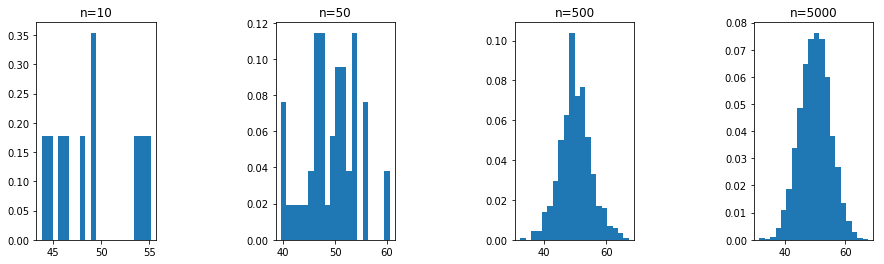

In [3]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

# Your comment and explanation here
Mientras mas muestras tomas, mas se parece el histograma a una Curva de Gauss.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who watched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

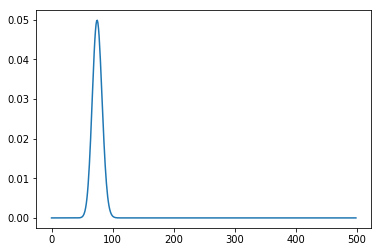

In [10]:
# Your code here
from scipy.stats import binom

n, p = 500, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

# Your comment here
Es una grafica que explica el evento en el cual 5 personas miran una pagina con un Ad al mismo tiempo. El eje Y es la probabilidad de que en el evento al menos n personas vean el ad. El eje x es el numero de variables del evento

#### Now plot PMP with 50, 500, and 5000 visitors.

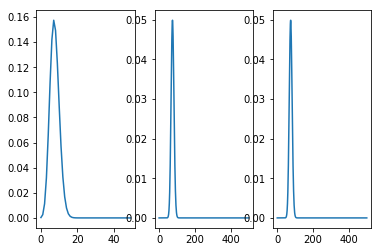

In [11]:
# Your code here
from scipy.stats import binom

dist = binom(n, p)

plt.subplot(131)
n1, p1 = 50, 0.15
x = range(n1)
plt.plot(x, binom(n1, p1).pmf(x))

plt.subplot(132)
n2, p2= 500, 0.15
x = range(n2)
plt.plot(x, binom(n2, p2).pmf(x))

plt.subplot(133)
n3, p3 = 500, 0.15
x = range(n3)
plt.plot(x, binom(n3,p3).pmf(x))

plt.show()

#### What did you notice from the distribution plots? Comment your findings.

# Your comment here
Cada vez que aumento el valor de N, se hace mas insignificante el porcentaje para que ocurra en mas elementos

# Challenge 3

#### Research the Poisson distribution. Write about your own understanding of the Poisson distribution.

# Your comment here
Lo que podemos observar de la probabilidad y las estadísticas, la distribución de Poisson es una distribución de probabilidad discreta que expresa, desde una frecuencia de ocurrencia promedio, la probabilidad de que ocurra un cierto número de eventos durante un cierto período de tiempo. Se podria decir que esta especializa en la probabilidad de ocurrencia de eventos con probabilidades muy pequeñas o eventos no habituales.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [14]:
# Your code here
N = 320

rv = poisson(300)

print(rv.pmf(N))



0.011612348610402475


#### What is the probability of getting 60 visits?

In [15]:
# Your code here
N = 60

rv = poisson(300)

print(rv.pmf(N))

2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

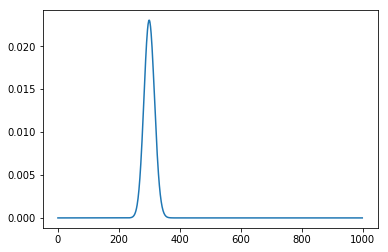

In [16]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)